<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/Conceptos_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import math

# Configuración para gráficos
plt.style.use('ggplot')
sns.set_style('whitegrid')
%matplotlib inline

# LSTM: Aplicaciones en Secuencias y Series Temporales

Las LSTM están diseñadas para trabajar con datos secuenciales en general, pero se utilizan específicamente tanto para secuencias como para series temporales, aunque con distintos enfoques y casos de uso.

# Uso de LSTM en Series Temporales
Las LSTM son ampliamente utilizadas y muy efectivas para series temporales, particularmente por estas razones:



*   Memoria de largo plazo: Capturan patrones estacionales y tendencias que ocurren a diferentes escalas temporales.
*   Predicción paso a paso: Excelentes para forecast de valores futuros en series numéricas
*   Manejo de multivariate time series: Pueden incorporar múltiples variables predictoras
*   Robustez ante intervalos irregulares: Funcionan bien incluso cuando hay gaps en los datos

# Casos de uso típicos:

*  Predicción de precios financieros
*  Pronóstico de demanda energética
*  Predicción de variables meteorológicas
*  Análisis de señales biométricas (ECG, EEG)
*  Predicción de carga de servidores

# Uso de LSTM en Generación de Secuencias

Las LSTM también son potentes para secuencias generales (no necesariamente temporales), como:

*   Generación de texto: Crear texto caracter por caracter o palabra por palabra
*   Música: Generar notas musicales en secuencia
*   Traducción automática: Producir secuencias de palabras en otro idioma
*   Reconocimiento de voz: Secuencias de fonemas o palabras
*   Análisis de secuencias proteicas: En aplicaciones de bioinformática


# Conclusión

Las LSTM son igualmente valiosas en ambos contextos, pero actualmente para generación creativa de secuencias (texto, música, etc.), los modelos Transformer (como GPT, BERT) han superado a las LSTM en muchas aplicaciones.

Para series temporales numéricas puras, las LSTM siguen siendo una opción muy competitiva y ampliamente utilizada, aunque empiezan a combinarse con mecanismos de atención o a ser complementadas con modelos como Temporal Fusion Transformers para resultados aún mejores.






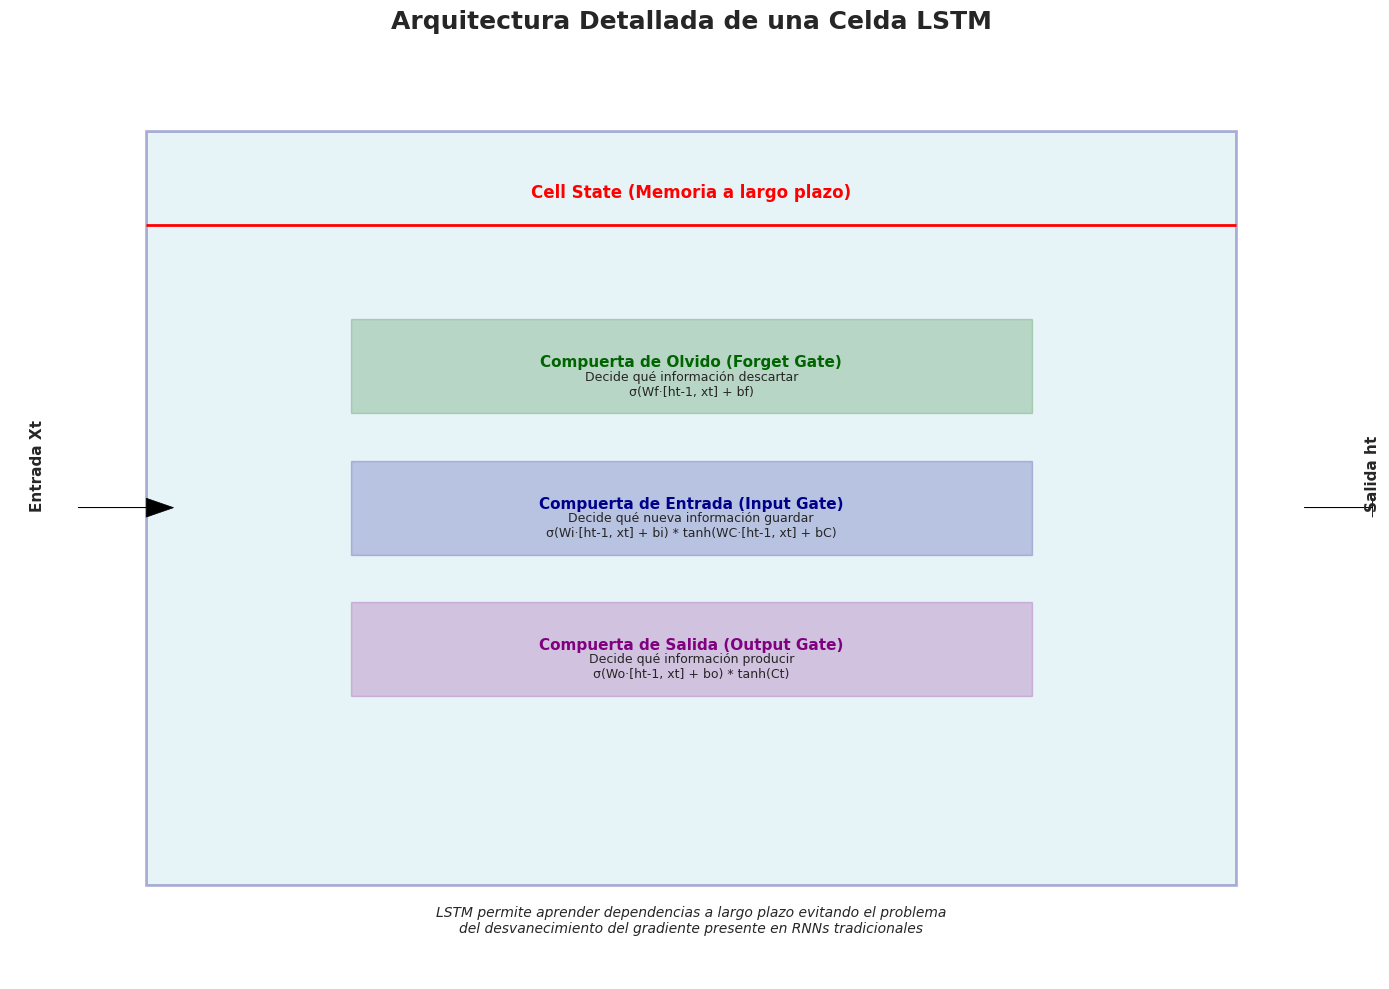


--- Ventajas de LSTM para Series Temporales ---
• Control de memoria: Capacidad para retener información relevante por largos periodos
• Filtrado selectivo: Las compuertas deciden qué información preservar o descartar
• Robustez ante gaps: Manejo efectivo de secuencias con intervalos irregulares
• Captura de patrones: Identificación de patrones cíclicos y estacionalidades
• Aprendizaje jerárquico: Capacidad para identificar características de diferentes niveles temporales


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Crear figura con mejor resolución
plt.figure(figsize=(14, 10))

# Configurar el lienzo principal
ax = plt.subplot(1, 1, 1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Dibujar el contorno de la celda LSTM
cell = patches.Rectangle((1, 1), 8, 8, linewidth=2, edgecolor='navy', facecolor='lightblue', alpha=0.3)
ax.add_patch(cell)

# Título principal
plt.title('Arquitectura Detallada de una Celda LSTM', fontsize=18, fontweight='bold')

# Flujo de datos - líneas
ax.arrow(0.5, 5, 0.5, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
ax.arrow(9.5, 5, 0.5, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')

# Estado de celda (Cell State) - línea superior
ax.arrow(1, 8, 8, 0, head_width=0, head_length=0, fc='red', ec='red', lw=2)
ax.text(5, 8.3, 'Cell State (Memoria a largo plazo)', ha='center', fontsize=12, fontweight='bold', color='red')

# Componentes internos
components = [
    {"name": "Compuerta de Olvido (Forget Gate)", "y": 6.5, "color": "darkgreen",
     "desc": "Decide qué información descartar\nσ(Wf·[ht-1, xt] + bf)"},
    {"name": "Compuerta de Entrada (Input Gate)", "y": 5, "color": "darkblue",
     "desc": "Decide qué nueva información guardar\nσ(Wi·[ht-1, xt] + bi) * tanh(WC·[ht-1, xt] + bC)"},
    {"name": "Compuerta de Salida (Output Gate)", "y": 3.5, "color": "purple",
     "desc": "Decide qué información producir\nσ(Wo·[ht-1, xt] + bo) * tanh(Ct)"}
]

# Dibujar componentes
for comp in components:
    gate = patches.Rectangle((2.5, comp["y"]-0.5), 5, 1, linewidth=1,
                           edgecolor=comp["color"], facecolor=comp["color"], alpha=0.2)
    ax.add_patch(gate)
    ax.text(5, comp["y"], comp["name"], ha='center', fontsize=11, fontweight='bold', color=comp["color"])
    ax.text(5, comp["y"]-0.3, comp["desc"], ha='center', fontsize=9)

# Entradas y salidas
ax.text(0.2, 5, "Entrada Xt", rotation=90, ha='center', fontsize=11, fontweight='bold')
ax.text(10, 5, "Salida ht", rotation=90, ha='center', fontsize=11, fontweight='bold')

# Ecuación general
plt.text(5, 0.5,
         "LSTM permite aprender dependencias a largo plazo evitando el problema\n" +
         "del desvanecimiento del gradiente presente en RNNs tradicionales",
         ha='center', fontsize=10, fontstyle='italic')

plt.tight_layout()
plt.show()

# Explicación adicional
print("\n--- Ventajas de LSTM para Series Temporales ---")
print("• Control de memoria: Capacidad para retener información relevante por largos periodos")
print("• Filtrado selectivo: Las compuertas deciden qué información preservar o descartar")
print("• Robustez ante gaps: Manejo efectivo de secuencias con intervalos irregulares")
print("• Captura de patrones: Identificación de patrones cíclicos y estacionalidades")
print("• Aprendizaje jerárquico: Capacidad para identificar características de diferentes niveles temporales")

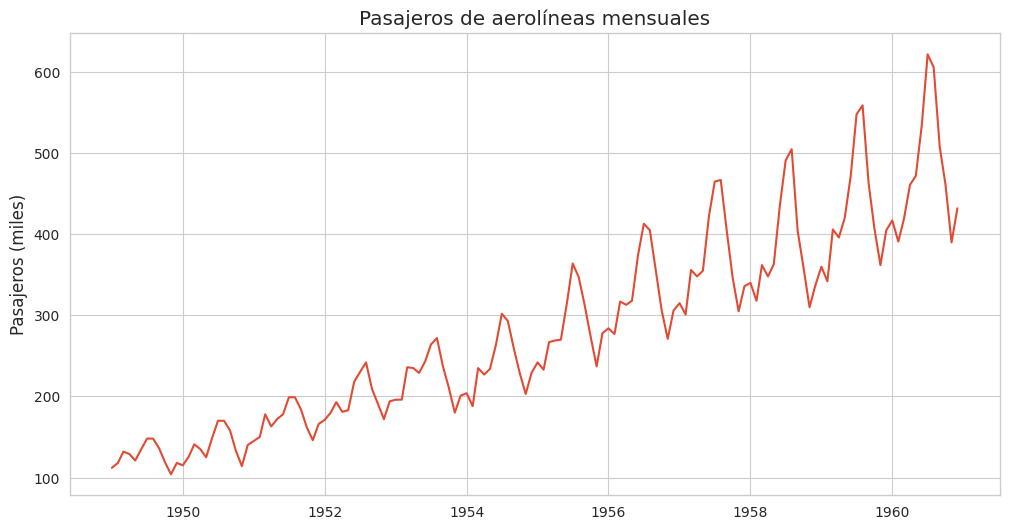

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pasajeros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Estadísticas descriptivas:
        pasajeros
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [3]:
# Cargar datos de ejemplo - usaremos un dataset simple de pasajeros de aerolíneas
# También podrías usar datos de yahoo finance, datos climatológicos, etc.
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df.columns = ['fecha', 'pasajeros']
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.title('Pasajeros de aerolíneas mensuales')
plt.ylabel('Pasajeros (miles)')
plt.grid(True)
plt.plot(df)
plt.show()

# Información básica del dataset
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

In [4]:
# Convertir a array y escalar los datos
dataset = df.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

# Función para crear secuencias X, y para LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definir longitud de secuencia (cuántos meses anteriores usamos para predecir)
sequence_length = 12  # un año de datos mensuales

# Crear secuencias para entrenamiento
X, y = create_sequences(dataset_scaled, sequence_length)
print(f"Shape de X: {X.shape} - Shape de y: {y.shape}")

# Dividir en conjuntos de entrenamiento y prueba (70% - 30%)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Shape de X: (132, 12, 1) - Shape de y: (132, 1)
Conjunto de entrenamiento: (92, 12, 1)
Conjunto de prueba: (40, 12, 1)


In [ ]:
# Crear el modelo LSTM
model = Sequential()

# Primera capa LSTM con dropout para evitar sobreajuste
model.add(LSTM(units=50,
               return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Segunda capa LSTM
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Capa de salida (una única predicción)
model.add(Dense(units=1))

# Compilar modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - loss: 0.0515 - val_loss: 0.0990
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0202 - val_loss: 0.0292
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0068 - val_loss: 0.0158
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0121 - val_loss: 0.0163
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0112 - val_loss: 0.0161
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0064 - val_loss: 0.0244
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0073 - val_loss: 0.0282
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0062 - val_loss: 0.0236
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0062 - val_loss: 0.0167
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0057 - val_loss: 0.0146
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0055 - val_loss: 0.0150
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0057 - val_l

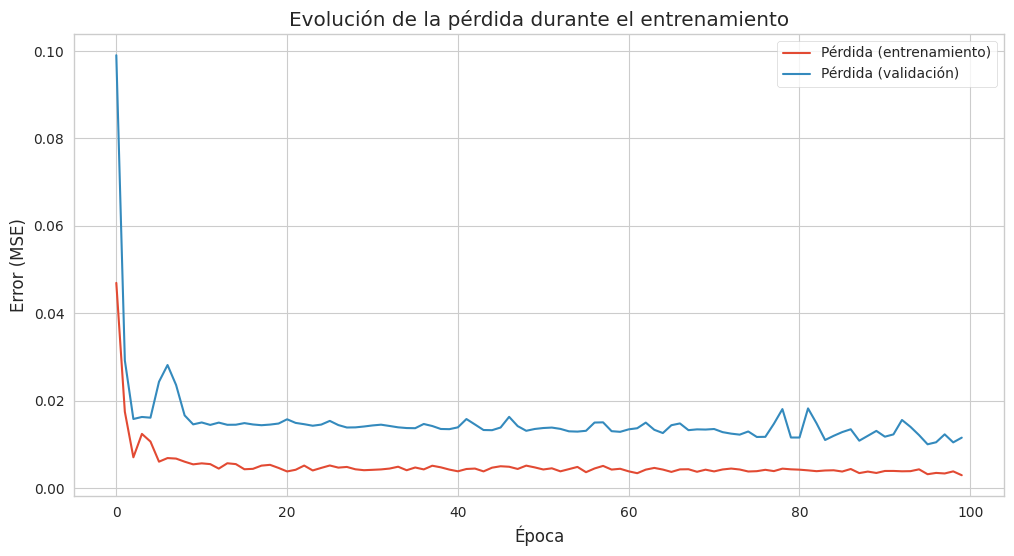

In [ ]:
# Entrenar modelo con early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Visualizar pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Invertir el escalado para obtener valores originales
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

# Calcular métricas de error
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f'Error cuadrático medio (MSE): {mse:.4f}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse:.4f}')
print(f'Error absoluto medio (MAE): {mae:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
Error cuadrático medio (MSE): 6768.8774
Raíz del error cuadrático medio (RMSE): 82.2732
Error absoluto medio (MAE): 74.5128


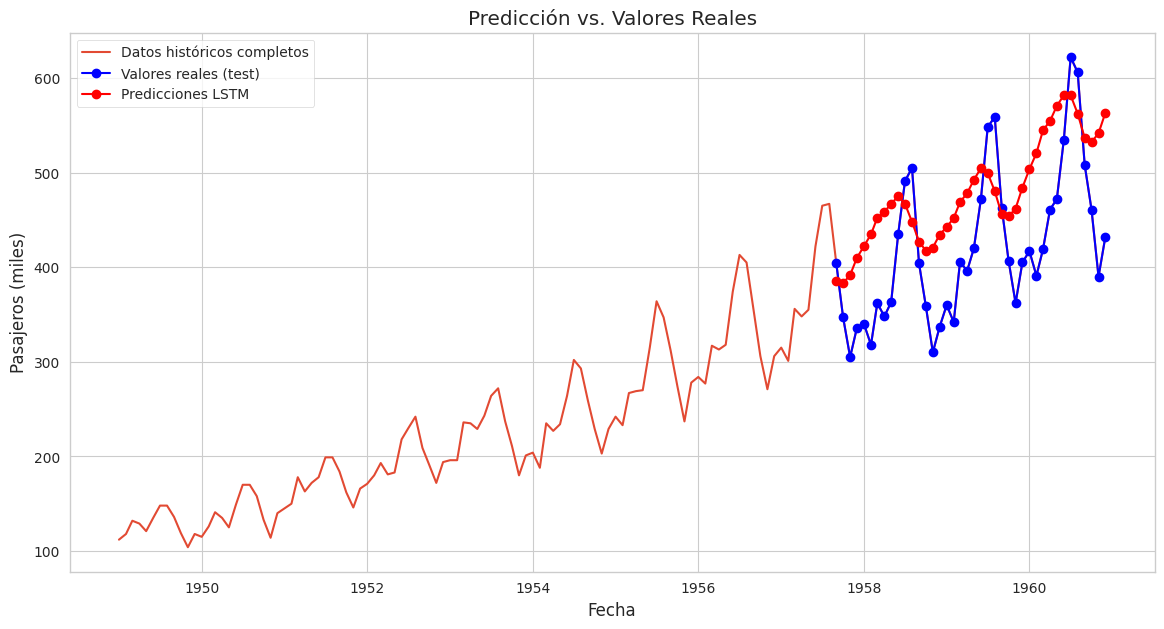

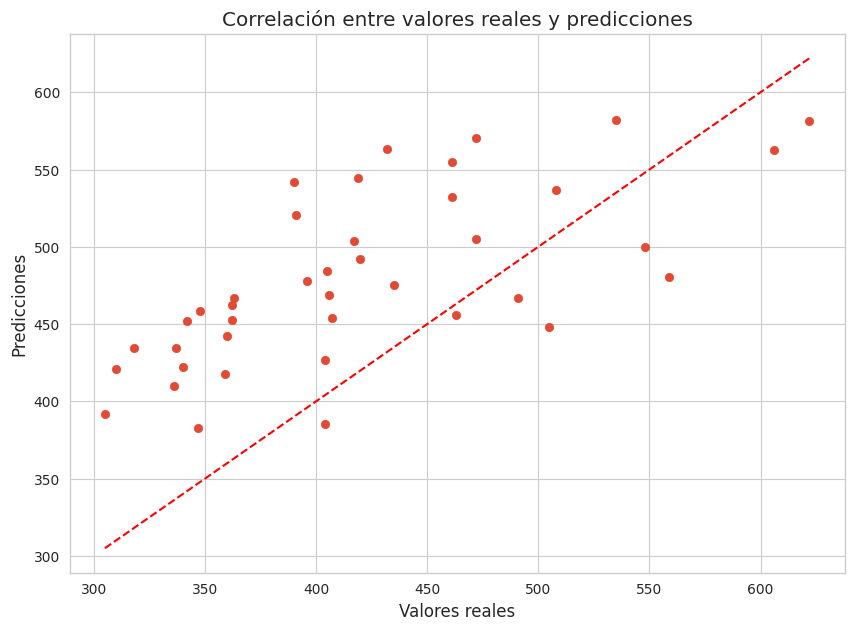

In [ ]:
# Crear dataframe para visualizar
pred_df = pd.DataFrame(y_test_actual, columns=['Actual'])
pred_df['Predicción'] = y_pred_actual

# Obtener fechas del conjunto de prueba para el eje X
test_dates = df.index[sequence_length + train_size:sequence_length + len(X)]
pred_df.index = test_dates

# Visualizar predicciones vs valores reales
plt.figure(figsize=(14, 7))
plt.title('Predicción vs. Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros (miles)')
plt.plot(df, label='Datos históricos completos')
plt.plot(pred_df['Actual'], 'bo-', label='Valores reales (test)')
plt.plot(pred_df['Predicción'], 'ro-', label='Predicciones LSTM')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de dispersión para ver correlación entre predicciones y valores reales
plt.figure(figsize=(10, 7))
plt.scatter(pred_df['Actual'], pred_df['Predicción'])
plt.title('Correlación entre valores reales y predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.plot([pred_df['Actual'].min(), pred_df['Actual'].max()],
         [pred_df['Actual'].min(), pred_df['Actual'].max()], 'r--')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/tmp/ipython-input-2289648036.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')


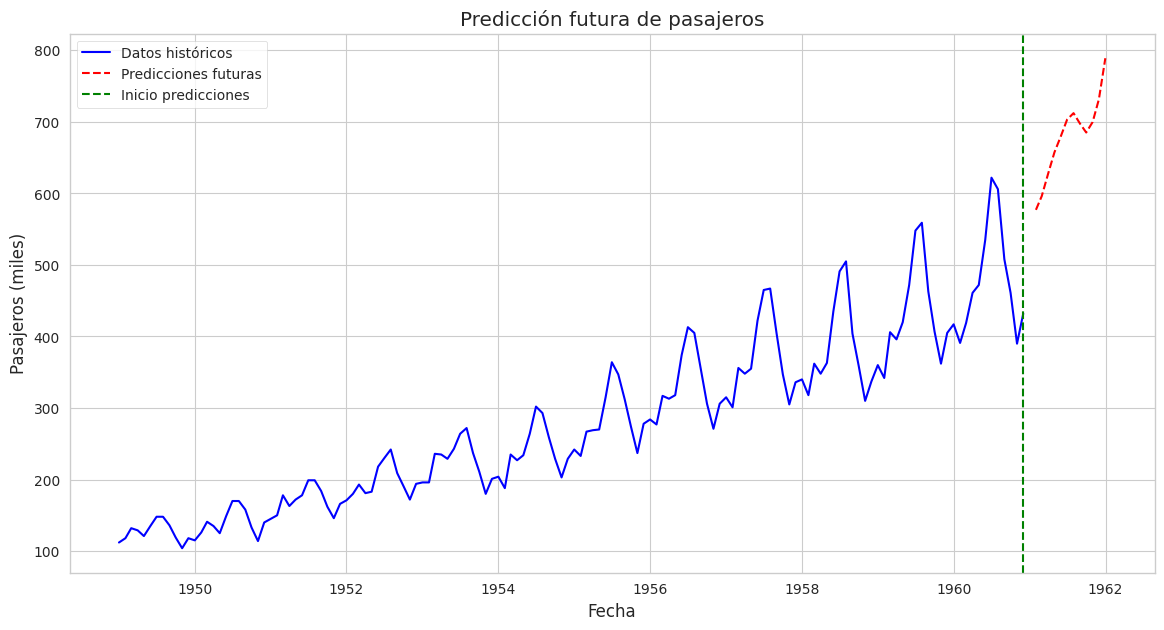

In [ ]:
# Crear secuencia con los últimos datos conocidos para predecir valores futuros
last_sequence = dataset_scaled[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1)

# Predecir los próximos 12 meses
future_predictions = []

current_sequence = last_sequence.copy()
for _ in range(12):  # Predecir 12 meses hacia adelante
    # Predecir el siguiente mes
    next_month = model.predict(current_sequence)[0]

    # Agregar a nuestras predicciones
    future_predictions.append(next_month)

    # Actualizar la secuencia para predecir el mes siguiente
    current_sequence = np.append(current_sequence[:, 1:, :],
                               [[next_month]],
                               axis=1)

# Convertir predicciones a valores originales
future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Crear fechas futuras para el eje X
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

# Visualizar predicciones futuras
plt.figure(figsize=(14, 7))
plt.title('Predicción futura de pasajeros')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros (miles)')

# Datos históricos
plt.plot(df.index, df['pasajeros'], 'b-', label='Datos históricos')

# Predicciones futuras
plt.plot(future_dates, future_predictions, 'r--', label='Predicciones futuras')

plt.axvline(x=last_date, color='green', linestyle='--', label='Inicio predicciones')
plt.legend()
plt.grid(True)
plt.show()